<a href="https://colab.research.google.com/github/angy-stack/cv.angy/blob/main/devoir_analyse_de_donn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
uploaded = files.upload()


Saving Alcool-UTF8-PointVirgule.csv to Alcool-UTF8-PointVirgule.csv


In [11]:
import pandas as pd

# Adapter au nom réel du fichier une fois uploadé
df = pd.read_csv("Alcool-UTF8-PointVirgule.csv", sep=";")
df.head()


,Unnamed: 0,PASTIS,WHISKY,MARTINI,SUZE,VODKA,GIN,MALIBU,BIERE
0,Aime le goût,49,50,42,18,25,23,25,59
1,Avec des amis,83,83,76,60,69,68,69,74
2,Pour se détendre,61,61,51,32,38,39,39,72
3,Qui revient cher,60,88,42,41,75,70,61,19
4,"Rafraîchissante, désaltérante",78,22,18,19,17,19,14,80


In [12]:
# Étape 3 : Statistiques de base
print("Statistiques de base :")
print(df.describe())


Statistiques de base :
       PASTIS                WHISKY                MARTINI               \
count             20.000000             20.000000             20.000000   
mean              47.500000             57.300000             40.650000   
std               27.867166             28.809903             27.120152   
min                3.000000              4.000000              9.000000   
25%               25.500000             33.750000             16.750000   
50%               47.000000             61.500000             32.500000   
75%               67.500000             84.000000             59.250000   
max               88.000000             92.000000             87.000000   

       SUZE                  VODKA                 GIN                   \
count             20.000000             20.000000             20.000000   
mean              31.250000             44.700000             43.900000   
std               20.940706             26.754439             26.074589   
m

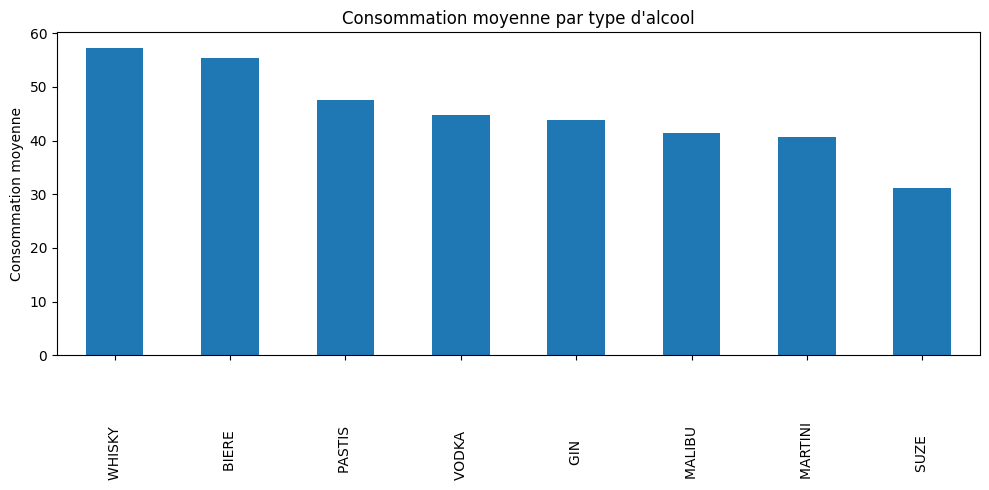

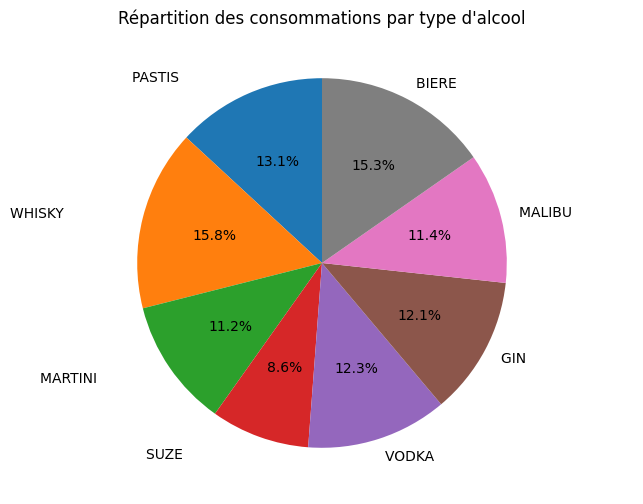

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Moyenne de consommation pour chaque type d'alcool
moyennes = df.drop(columns=['Unnamed: 0']).mean().sort_values(ascending=False)

moyennes.plot(kind='bar', figsize=(10, 5), title="Consommation moyenne par type d'alcool")
plt.ylabel("Consommation moyenne")
plt.tight_layout()
plt.show()
totaux = df.drop(columns=['Unnamed: 0']).sum()

totaux.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6), title="Répartition des consommations par type d'alcool")
plt.ylabel("")
plt.show()


In [14]:
!pip install prince


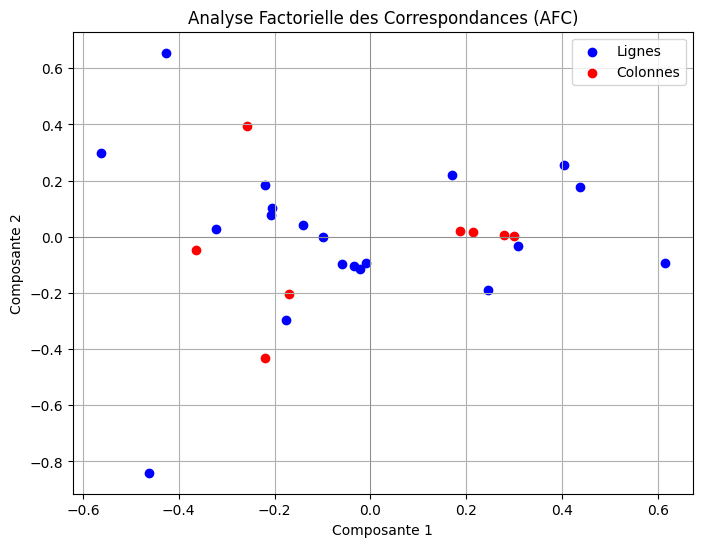

In [15]:
import prince

# Suppression de la colonne d'index si elle existe
df_afc = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Analyse Factorielle des Correspondances (AFC)
afc = prince.CA(n_components=2, n_iter=3, engine="sklearn")
afc = afc.fit(df_afc)

# Coordonnées des lignes
row_coords = afc.row_coordinates(df_afc)

# Coordonnées des colonnes
col_coords = afc.column_coordinates(df_afc)

# Affichage graphique
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(row_coords[0], row_coords[1], label='Lignes', c='blue')
plt.scatter(col_coords[0], col_coords[1], label='Colonnes', c='red')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.title("Analyse Factorielle des Correspondances (AFC)")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.legend()
plt.grid(True)
plt.show()


Centres des clusters :
[[84.66666667 87.33333333 82.66666667 66.33333333 74.         72.33333333
  72.         81.66666667]
 [30.33333333 30.55555556 18.88888889 16.44444444 21.         20.33333333
  19.55555556 45.22222222]
 [52.875      76.125      49.375      34.75       60.375      59.75
  54.375      57.        ]]


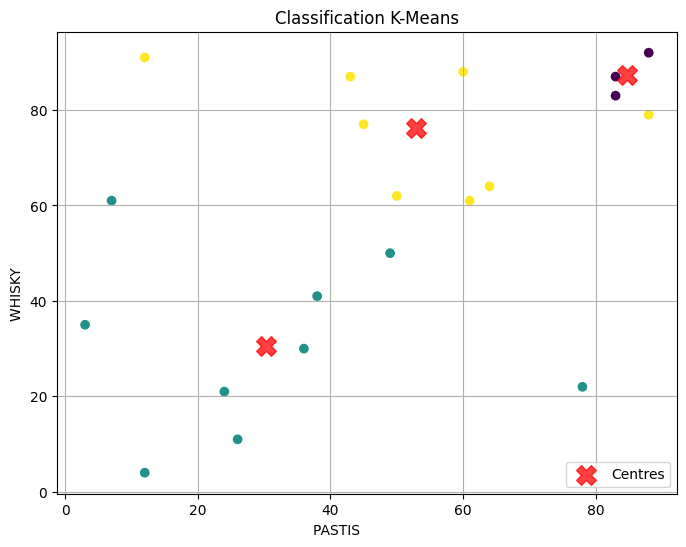

In [16]:
import prince

# Supposons qu'on fait l'AFC sur deux colonnes qualitatives
afc = prince.CA(n_components=2, n_iter=3, copy=True, check_input=True, engine='auto')
qual_cols = df.select_dtypes(include='object')

# On garde que les variables qualitatives avec peu de modalités
if qual_cols.shape[1] >= 2:
    afc_data = qual_cols.iloc[:, :2]
    afc_fit = afc.fit(afc_data)
    afc_fit.plot_coordinates(X=afc_data, figsize=(8, 6), show_row_labels=True, show_col_labels=True)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# On sélectionne uniquement les colonnes numériques et on enlève les valeurs manquantes
num_df = df.select_dtypes(include='number').dropna()

# On applique KMeans avec 3 clusters (tu peux changer le nombre si tu veux)
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(num_df)

# Affichage des centres des clusters (optionnel mais utile)
print("Centres des clusters :")
print(kmeans.cluster_centers_)
# Affichage graphique des deux premières dimensions
plt.figure(figsize=(8, 6))
plt.scatter(num_df.iloc[:, 0], num_df.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centres')
plt.xlabel(num_df.columns[0])
plt.ylabel(num_df.columns[1])
plt.title('Classification K-Means')
plt.legend()
plt.grid(True)
plt.show()



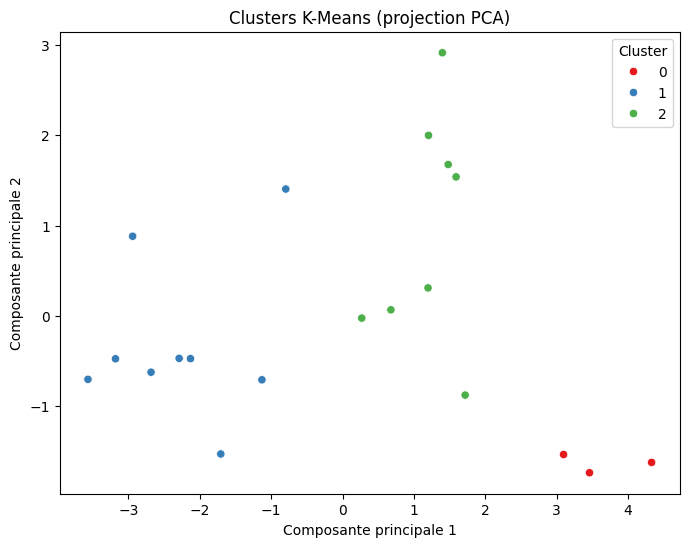

In [17]:
# Étape 6 : Classification K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Sélection des colonnes numériques pour le clustering
num_df = df.select_dtypes(include='number').dropna()

# Standardisation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

# Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualisation 2D (PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df['Cluster'], palette='Set1')
plt.title("Clusters K-Means (projection PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()


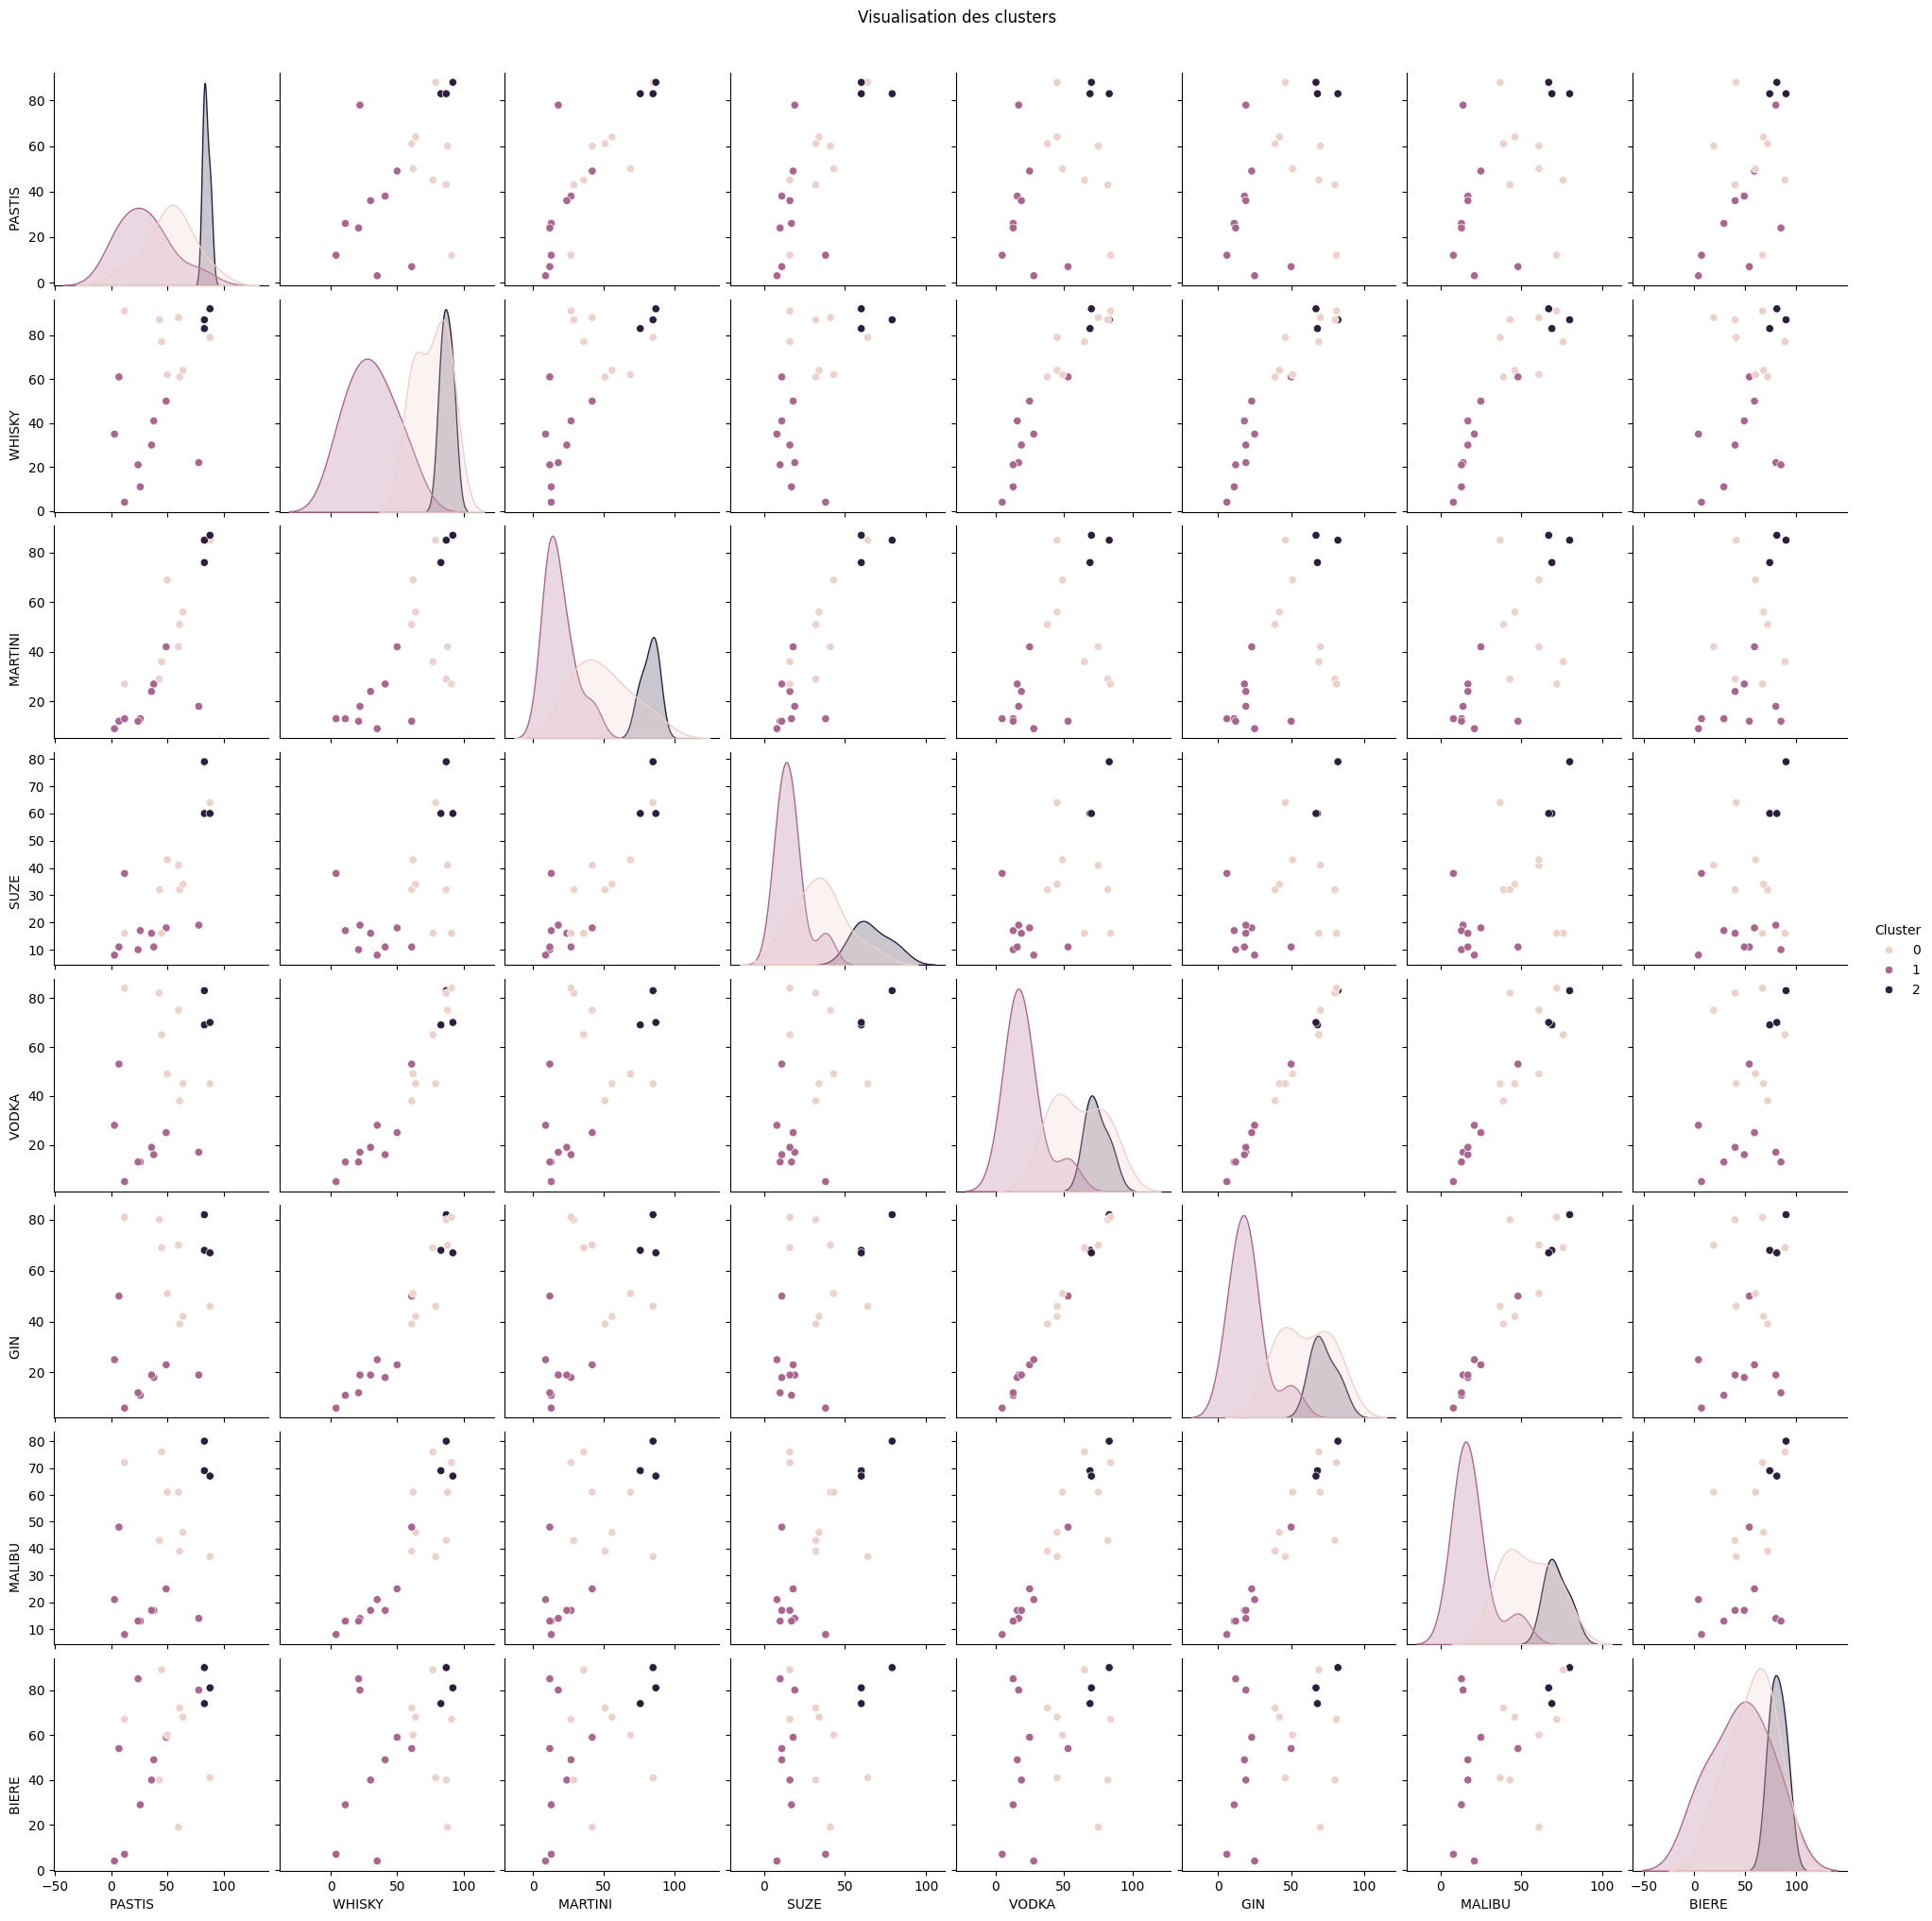

In [18]:
# Appliquer la standardisation
scaled_data = scaler.fit_transform(num_df)

# Choisir un nombre de clusters (par exemple 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Ajouter les labels au DataFrame
df['Cluster'] = kmeans.labels_

# Visualiser les clusters avec une pairplot
sns.pairplot(df, hue='Cluster', diag_kind='kde')
plt.suptitle("Visualisation des clusters", y=1.02)
plt.show()


In [23]:
df.columns = df.columns.str.strip()


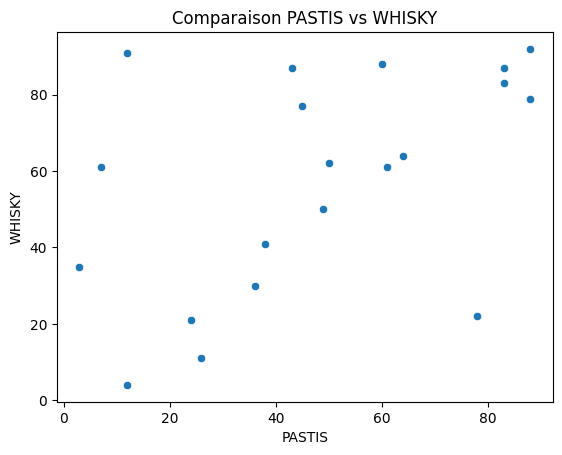

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nettoyage des noms de colonnes
df.columns = df.columns.str.strip()

# Exemple : PASTIS vs WHISKY
sns.scatterplot(data=df, x='PASTIS', y='WHISKY')
plt.title('Comparaison PASTIS vs WHISKY')
plt.show()


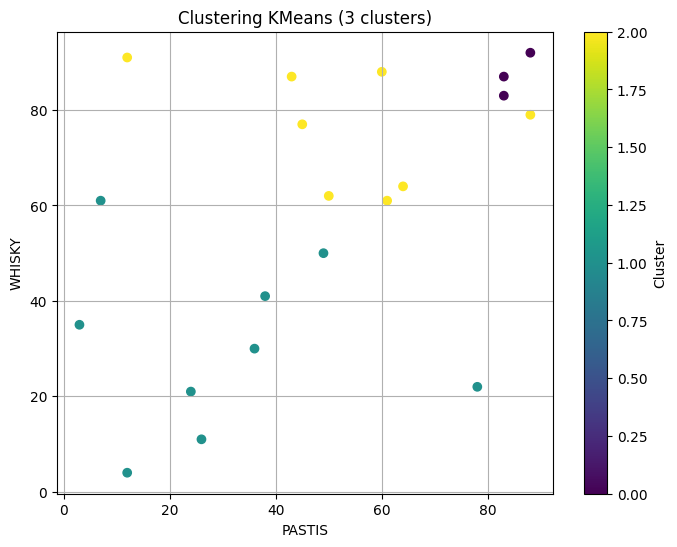

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# On sélectionne uniquement les colonnes numériques et on enlève les valeurs manquantes
num_df = df.select_dtypes(include='number').dropna()

# Application de KMeans avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(num_df)

# Ajout des clusters au dataframe
df['Cluster'] = clusters

# Visualisation simple (exemple avec PASTIS et WHISKY)
plt.figure(figsize=(8, 6))
plt.scatter(df['PASTIS'], df['WHISKY'], c=clusters, cmap='viridis')
plt.xlabel('PASTIS')
plt.ylabel('WHISKY')
plt.title('Clustering KMeans (3 clusters)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
